In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import nibabel as nib
import os
from sklearn.decomposition import PCA
import math
from skimage import io
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import time
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage.interpolation import rotate as rot
import glob
from scipy import ndimage
from scipy.ndimage.interpolation import zoom
import pickle
from skimage import measure
import cv2
import seaborn as sns
import pandas as pd


In [2]:
def compute_surface(bv_label):
    total_surface_area = 0
    
    bv_label_erosion = ndimage.binary_erosion(bv_label).astype(bv_label.dtype)
    bv_label_surface = bv_label - bv_label_erosion
    x, y, z = np.where(bv_label_surface==1)
    for i in range(len(x)):
        currect_sur_point = np.sum(bv_label[x[i]-1:x[i]+2,y[i],z[i]])+np.sum(bv_label[x[i],y[i]-1:y[i]+2,z[i]])+np.sum(bv_label[x[i],y[i],z[i]-1:z[i]+2])-2
        cur_point_surface = 7 - currect_sur_point
        total_surface_area += cur_point_surface
    return total_surface_area

def save_img(img, label, count):
    img_nft = nib.Nifti1Image(img,np.eye(4))
    img_save_data_path = './resize_img/img{}.nii'.format(count)
    nib.save(img_nft,img_save_data_path)
    
    img_nft = nib.Nifti1Image(label,np.eye(4))
    img_save_data_path = './resize_img/label{}.nii'.format(count)
    nib.save(img_nft,img_save_data_path)
    

In [3]:
data_base_path = '/scratch/zq415/grammar_cor/mutant_detect/mutant_cla/data/logitudinal'
data_folder_list = ['2016', '2017', '2018']

all_BVs = []
for cur_floder in data_folder_list:
    cur_folder_path = os.path.join(data_base_path,cur_floder)
    all_BVs += glob.glob(cur_folder_path+'/*BV*')
print(len(all_BVs))

433


In [4]:
count = 0
mutant_label = {}

for i,img_path in enumerate(all_BVs):    
    img_label = nib.load(img_path)
    img_label = np.uint8(img_label.get_data())
    img_label[img_label>0] = 1
    
    print(i, np.sum(img_label))
    y_predict_component = measure.label(img_label)
    component_num = np.unique(y_predict_component)
    for current_component in range(1,len(component_num)):
        if np.sum(y_predict_component == current_component) < 300:
            img_label[y_predict_component == current_component] = 0
    bv_volume = np.sum(img_label)
    bv_surface = compute_surface(img_label)
    
    print(i, bv_volume, bv_surface)
    
    save_img(img_label, img_label, count)
    count += 1
    
    bv_base_name = os.path.basename(img_path)[:-14]
   
    mutant_label[i] = (i, bv_base_name, img_label, bv_volume, bv_surface, img_path)

0 38038
0 38038 15620.0
1 13979
1 13237 13250.0
2 23353
2 23353 15862.0
3 18374
3 17789 16636.0
4 37942
4 37942 22106.0
5 33914
5 33800 20078.0
6 13627
6 12824 11796.0
7 28996
7 28982 16798.0
8 31458
8 31448 19278.0
9 28494
9 28494 18146.0
10 13356
10 12733 11498.0
11 24204
11 23963 20634.0
12 31184
12 30877 20156.0
13 25538
13 25361 18004.0
14 30045
14 30045 18760.0
15 22771
15 22716 10990.0
16 24889
16 24882 16896.0
17 28066
17 28066 16000.0
18 27653
18 27653 15482.0
19 25386
19 25366 21690.0
20 19009
20 18983 15216.0
21 37483
21 37478 16374.0
22 21125
22 20888 16224.0
23 21116
23 21088 15766.0
24 17873
24 17500 13854.0
25 28935
25 28931 18292.0
26 27827
26 27815 16808.0
27 25420
27 25420 17592.0
28 18863
28 18500 14514.0
29 37416
29 37390 16032.0
30 24918
30 24483 18264.0
31 10102
31 9798 6686.0
32 32876
32 32876 18548.0
33 30647
33 30573 15030.0
34 12195
34 11864 10414.0
35 17215
35 16757 12396.0
36 21074
36 20983 16378.0
37 14516
37 14214 13758.0
38 32781
38 32778 20894.0
39 25442

301 19521 15568.0
302 21472
302 21128 15512.0
303 20583
303 20576 15560.0
304 31771
304 31768 19982.0
305 13411
305 12762 10940.0
306 16163
306 16013 13118.0
307 25082
307 25082 18136.0
308 23526
308 23522 16714.0
309 23702
309 23702 16842.0
310 28679
310 28652 19600.0
311 19957
311 19538 16042.0
312 25309
312 25309 17940.0
313 21821
313 21819 15994.0
314 26271
314 26271 14832.0
315 25458
315 25442 17144.0
316 25147
316 25147 12948.0
317 21568
317 21549 17476.0
318 23165
318 23164 15984.0
319 24417
319 24417 16958.0
320 21905
320 21894 16934.0
321 28047
321 28044 19482.0
322 20254
322 20128 14738.0
323 25392
323 25376 18376.0
324 36039
324 35881 19760.0
325 26673
325 26632 18890.0
326 28585
326 28581 18792.0
327 22421
327 22421 15834.0
328 24532
328 24504 20976.0
329 24819
329 24812 17094.0
330 26792
330 26792 18890.0
331 27504
331 27502 18736.0
332 26151
332 26040 16222.0
333 26071
333 26027 18222.0
334 30324
334 30112 17156.0
335 25905
335 25904 17860.0
336 22901
336 22897 16080.0
33

In [5]:
save_name = 'All_data_112_64_64_longitudinal_volume_surface.pickle'
save_file = open(os.path.join(os.getcwd(),'data',save_name),'wb')
pickle.dump(mutant_label,save_file)
save_file.close()


In [33]:
bv_volume_surface = []
bv_stage = []

In [35]:
for i in range(len(mutant_label)):
    if 'E10' in mutant_label[i][1]:
        bv_volume_surface.append([mutant_label[i][3],mutant_label[i][4]])
        bv_stage.append('E10')
    elif 'E11' in mutant_label[i][1]:
        bv_volume_surface.append([mutant_label[i][3],mutant_label[i][4]])
        bv_stage.append('E11')
    elif 'E12' in mutant_label[i][1]:
        bv_volume_surface.append([mutant_label[i][3],mutant_label[i][4]])
        bv_stage.append('E12')
    elif 'E13' in mutant_label[i][1]:
        bv_volume_surface.append([mutant_label[i][3],mutant_label[i][4]])
        bv_stage.append('E13')
    elif 'E14' in mutant_label[i][1]:
        bv_volume_surface.append([mutant_label[i][3],mutant_label[i][4]])
        bv_stage.append('E14')
    else:
        print(mutant_label[i][1])
print(len(bv_volume_surface), len(bv_stage))

20161121_En1_E1b-reg
20161121_En1_E7a-reg
20161121_En1_E4a-reg
20161121_En1_E1c_reg
20161121_En1_E1a-reg
20161121_En1_E5b_reg
20161121_En1_E2a-reg
20161121_En1_E6a_reg
20161121_En1_E3a_reg
424 424


In [40]:
df = pd.DataFrame(np.asarray(bv_volume_surface), columns=['volume', 'surface'])
df['stage'] = pd.Series(bv_stage)
print(df)

      volume  surface stage
0    13237.0  13250.0   E14
1    23353.0  15862.0   E12
2    17789.0  16636.0   E14
3    37942.0  22106.0   E12
4    33800.0  20078.0   E13
5    12824.0  11796.0   E11
6    28982.0  16798.0   E12
7    31448.0  19278.0   E12
8    28494.0  18146.0   E12
9    12733.0  11498.0   E12
10   23963.0  20634.0   E14
11   30877.0  20156.0   E12
12   25361.0  18004.0   E14
13   30045.0  18760.0   E12
14   22716.0  10990.0   E10
15   24882.0  16896.0   E13
16   28066.0  16000.0   E12
17   27653.0  15482.0   E12
18   25366.0  21690.0   E13
19   18983.0  15216.0   E13
20   20888.0  16224.0   E14
21   21088.0  15766.0   E11
22   17500.0  13854.0   E14
23   28931.0  18292.0   E12
24   27815.0  16808.0   E12
25   25420.0  17592.0   E12
26   18500.0  14514.0   E12
27   37390.0  16032.0   E11
28   24483.0  18264.0   E14
29    9798.0   6686.0   E12
..       ...      ...   ...
394  23852.0  17152.0   E13
395  24170.0  18294.0   E13
396  22571.0  16784.0   E13
397  38129.0  19658.

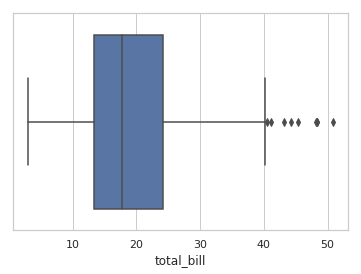

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

<IPython.core.display.Javascript object>


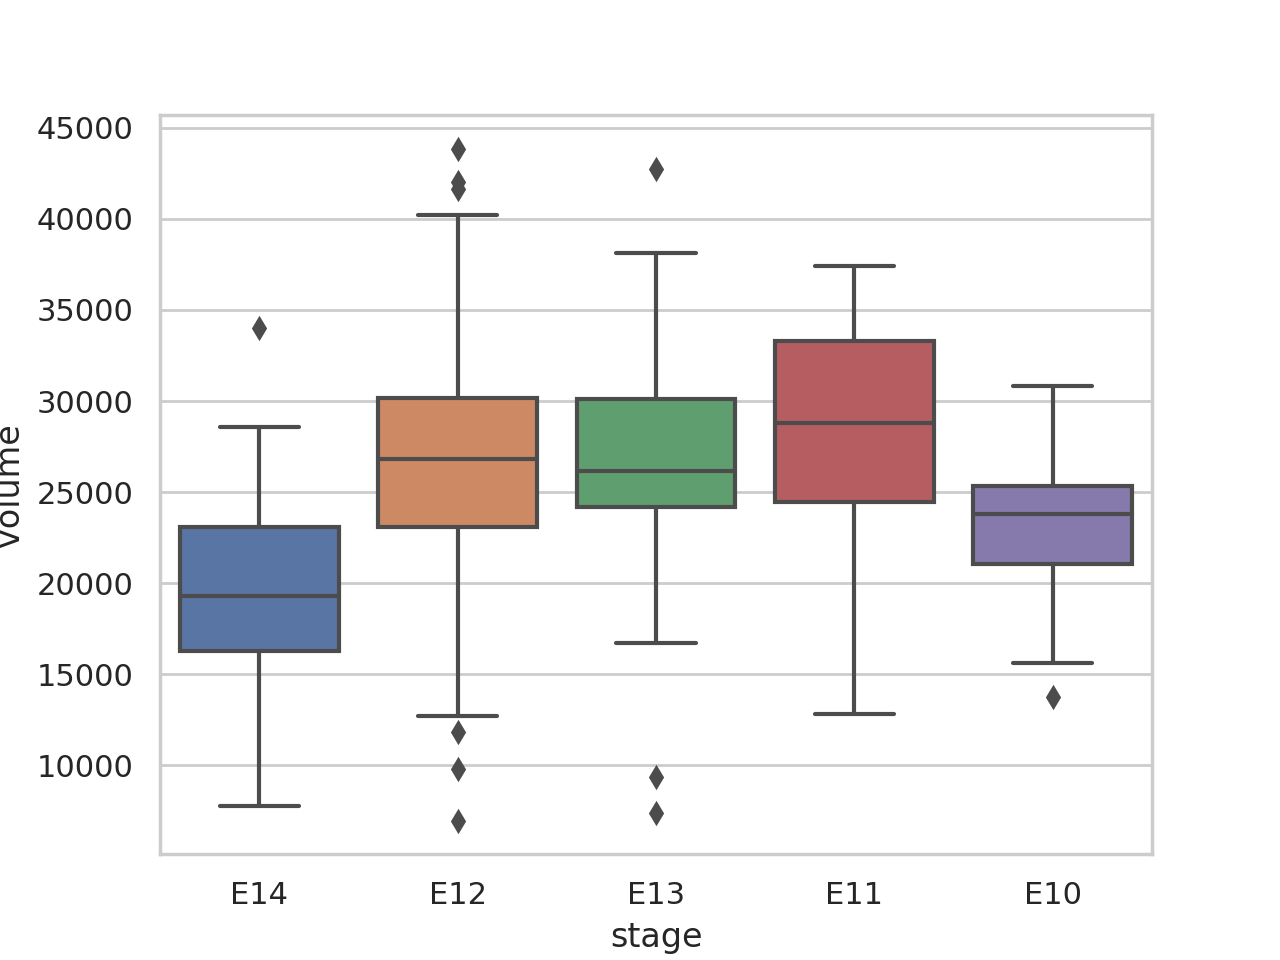

In [42]:
ax = sns.boxplot(x="stage", y="volume", data=df)

<IPython.core.display.Javascript object>


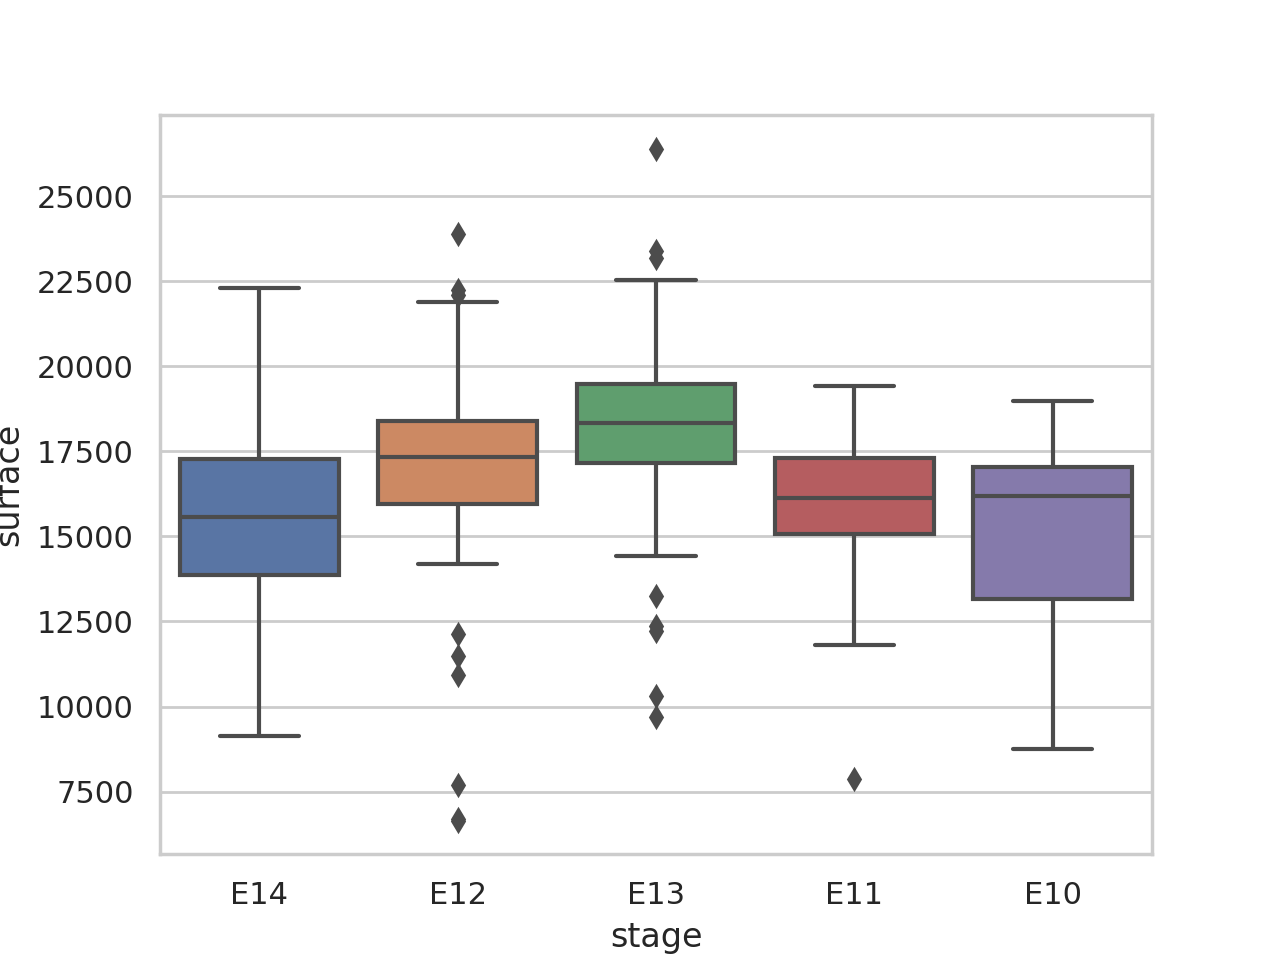

In [43]:
ax = sns.boxplot(x="stage", y="surface", data=df)

In [28]:
df['Col1'][0] = 'sss'

In [29]:
df

,Col1,Col2,Col3,Col4
0,sss,-0.751628,-0.845276,1.484911
1,-0.769545,-0.212507,-1.553058,1.117152
2,-0.973981,1.942778,0.883990,-0.913653
3,-0.149049,-2.233720,-0.075325,0.481631
4,-1.8494,0.541135,0.707316,1.337032
5,0.157573,0.636498,-0.825422,0.489777
6,-0.553391,-1.098485,0.095537,0.101531
7,1.46325,0.700419,-0.832478,0.829179
8,0.955226,0.015993,0.975668,0.257842
9,1.65458,-0.117611,-0.488933,0.446504


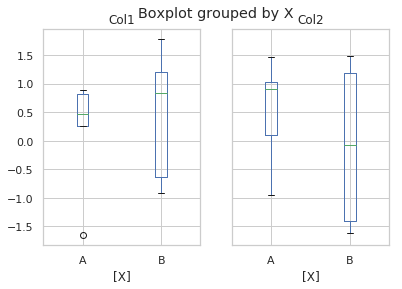

In [30]:
df = pd.DataFrame(np.random.randn(10, 2), columns=['Col1', 'Col2'])
# df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
# boxplot = df.boxplot(by='X')

In [2]:
save_name = 'All_data_112_64_64_longitudinal_volume_surface.pickle'
with open(os.path.join(os.getcwd(),'data',save_name), "rb") as input_file:
    mutant_label = pickle.load(input_file)

In [3]:
mutant_label[0]

(0, '20161121_En1_E1b-reg', memmap([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         ..., 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ..., 
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
       